# Internal Metadata

In the last module we learned about *file formats* and *standards* and how important they are for applications that *render* digital objects. In Module 4 we are looking even closer at file formats to examine the qualities that make them sustainable. In this notebook we will specifically be looking at *internal metadata*. 

In Chapter 4 Owens identified 7 different factors that make specific file formats sustainable:

1. **Disclosure:** if the specifications for the format are widely available, then it’s pos si  ble to validate files and to develop new modes for rendering them.
2. **Adoption:** the more widely a format is used, the more likely there  will be a range of implementations for it and the more likely  there will be continued market demand for making it possible to access the content.
3. **Transparency:** the more transparent the structure of information inside a file, the easier it  will be to make sense of the file if the ability to render it was lost.
4. **Self-documenting:** if a format embeds metadata in its files, then it’s more likely that someone could make sense of the file even if the ability to render the content had been lost.
5. **External dependencies:** the more a format depends on a particular piece of hardware, operating system, or software to render, the more susceptible it is to being unrenderable, if one of  those dependencies fails.
6. **Patents:** many file formats are proprietary, which can limit the number of their uses and make their lifetimes reliant on the com pany owning the patents.
7. **Technical protection mechanisms:** things like encryption or digital rights management software make it harder to access content, and as such become additional external dependencies to getting access to the content.

These factors are very important for digital curation work because if a standard is not open, or has patents associated with it, it might only be usable by a small number of expensive applications. When these applications are superseded or abandoned in the future, the data in that format becomes difficult to work with.

Whereas if a standard is openly available for free on the web, and has no patents associated with it, people can build wide support for data in that format. A diverse set  of implementations, and wide adoption help insure that a file format will be durable going forward. A lot of digital curation work is strategizing around how to move data forwards through time.

The **transparency** of a file format, and the extent to which it is **self-documenting** are also very important because they help determine how easy it is for people to work with data in that format. For example if you needed to know the resolution of image files, or what types of cameras were used to create them, or when the photographs were taken. Or perhaps you want to know the artists that created some mp3 files? In this notebook we will be exploring some commonly used media formats using opensource tools.

## Mount Google Drive

This week we're going to be using data that is stored in a Google Drive Share. **If you haven't already please email the instructor with the email address attached to your Google account so that you can be granted access to the shared drive.** Since you are looking at this notebook in colab.google.com you should look in the top right-hand corner of your browser and see your user avatar. If you hover over it should show you who you are logged in as.

When you run the cell below follow the instructions that appear in order to grant this notebook access to your Google Drive. This is temporary access, and Colab is a Google service so this is Google sharing data internally with itself.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path

info202 = Path('/content/drive/Shared drives/INFO202/')
print(info202.is_dir())

True


If you don't see **True** above then you will need to contact the instructor for help. The rest of this notebook depends on being able to access the data in the **INFO202** Google Drive share.

## Display an Image

In the previous modules we've been exploring data that has been collected as part of the [Govdocs1](https://digitalcorpora.org/corpora/files) dataset from Digital Corpora. Some of the images from that dataset have been added to the shared drive for us to experiment with.

First lets try using our notebook to view one of them. We need to import the `Image` class and then use it to create an image by giving it a path to one of our image files. In addition we specify the width of the image to use when displaying so that it wont' fill up the whole screen.

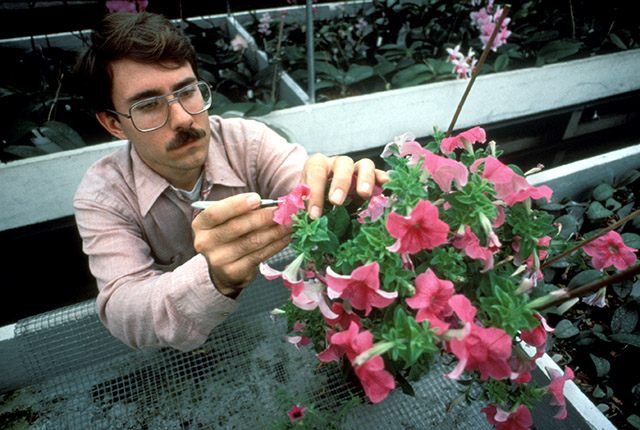

In [49]:
from IPython.display import Image

Image(filename="/content/drive/Shared drives/INFO202/images/910566.jpg", width=400, embed=True)


## Sampling Images

One nice thing about Python's `pathlib.Path` object is that you can easily use it to create a new path using the `/` operator. For example this expresion creates a new Path object using the one we created above for the `inst341` directory in our Google Shared Drive that has been mounted in the virtual machine where our Jupyter notebook is running.

In [4]:
images_dir = info202 / "images"

We can put all the image paths into a list using the familiar iterdir() method. This iterates through all the files in the images directory and puts them into a list which is assigned to the variable `images`.

In [5]:
image_paths = list(images_dir.iterdir())

Now we can use the `len` function to see how many there are:

In [6]:
len(image_paths)

130

We can even use Python's [random](https://docs.python.org/3/library/random.html) module to take a random sample of these images in the list and then display them here in the notebook using the `display` function.


'/content/drive/Shared drives/INST341/images/025935.jpg'

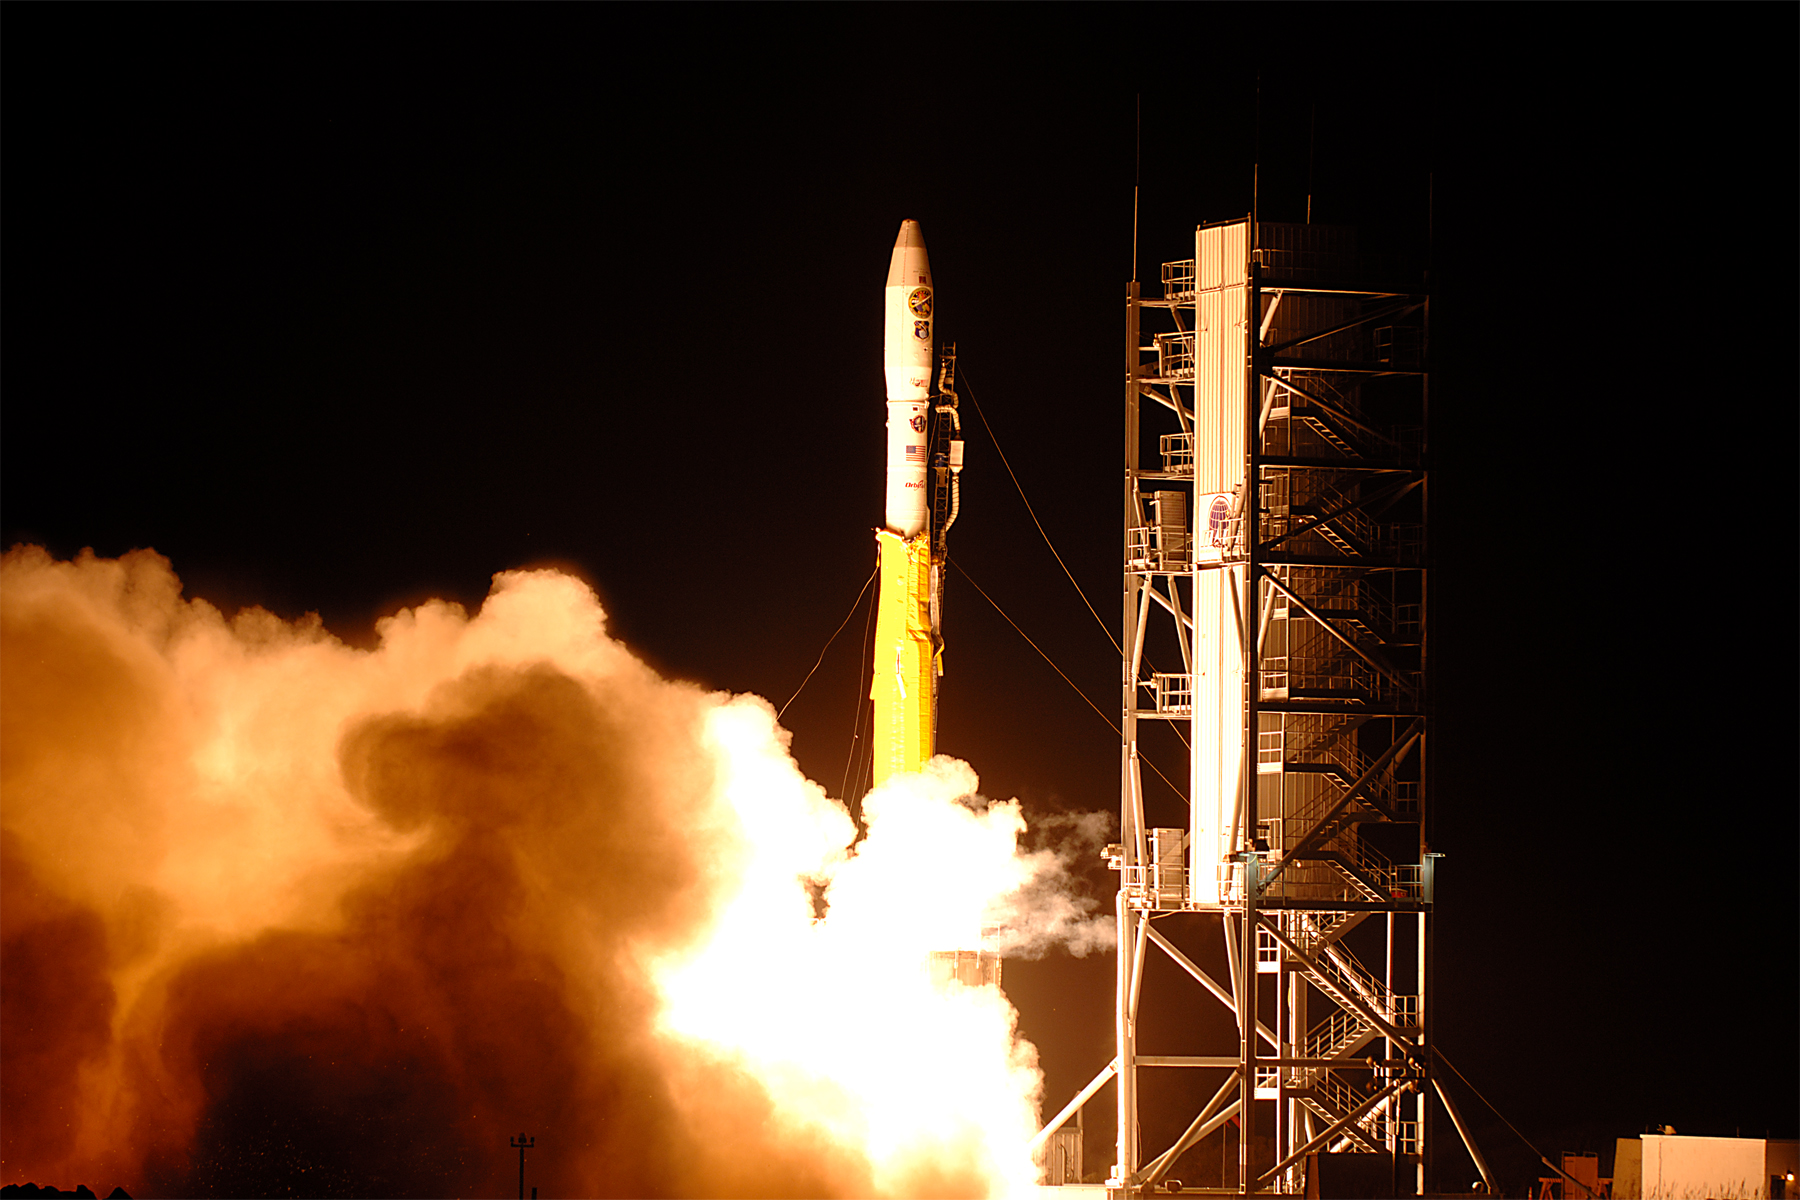

'/content/drive/Shared drives/INST341/images/889042.jpg'

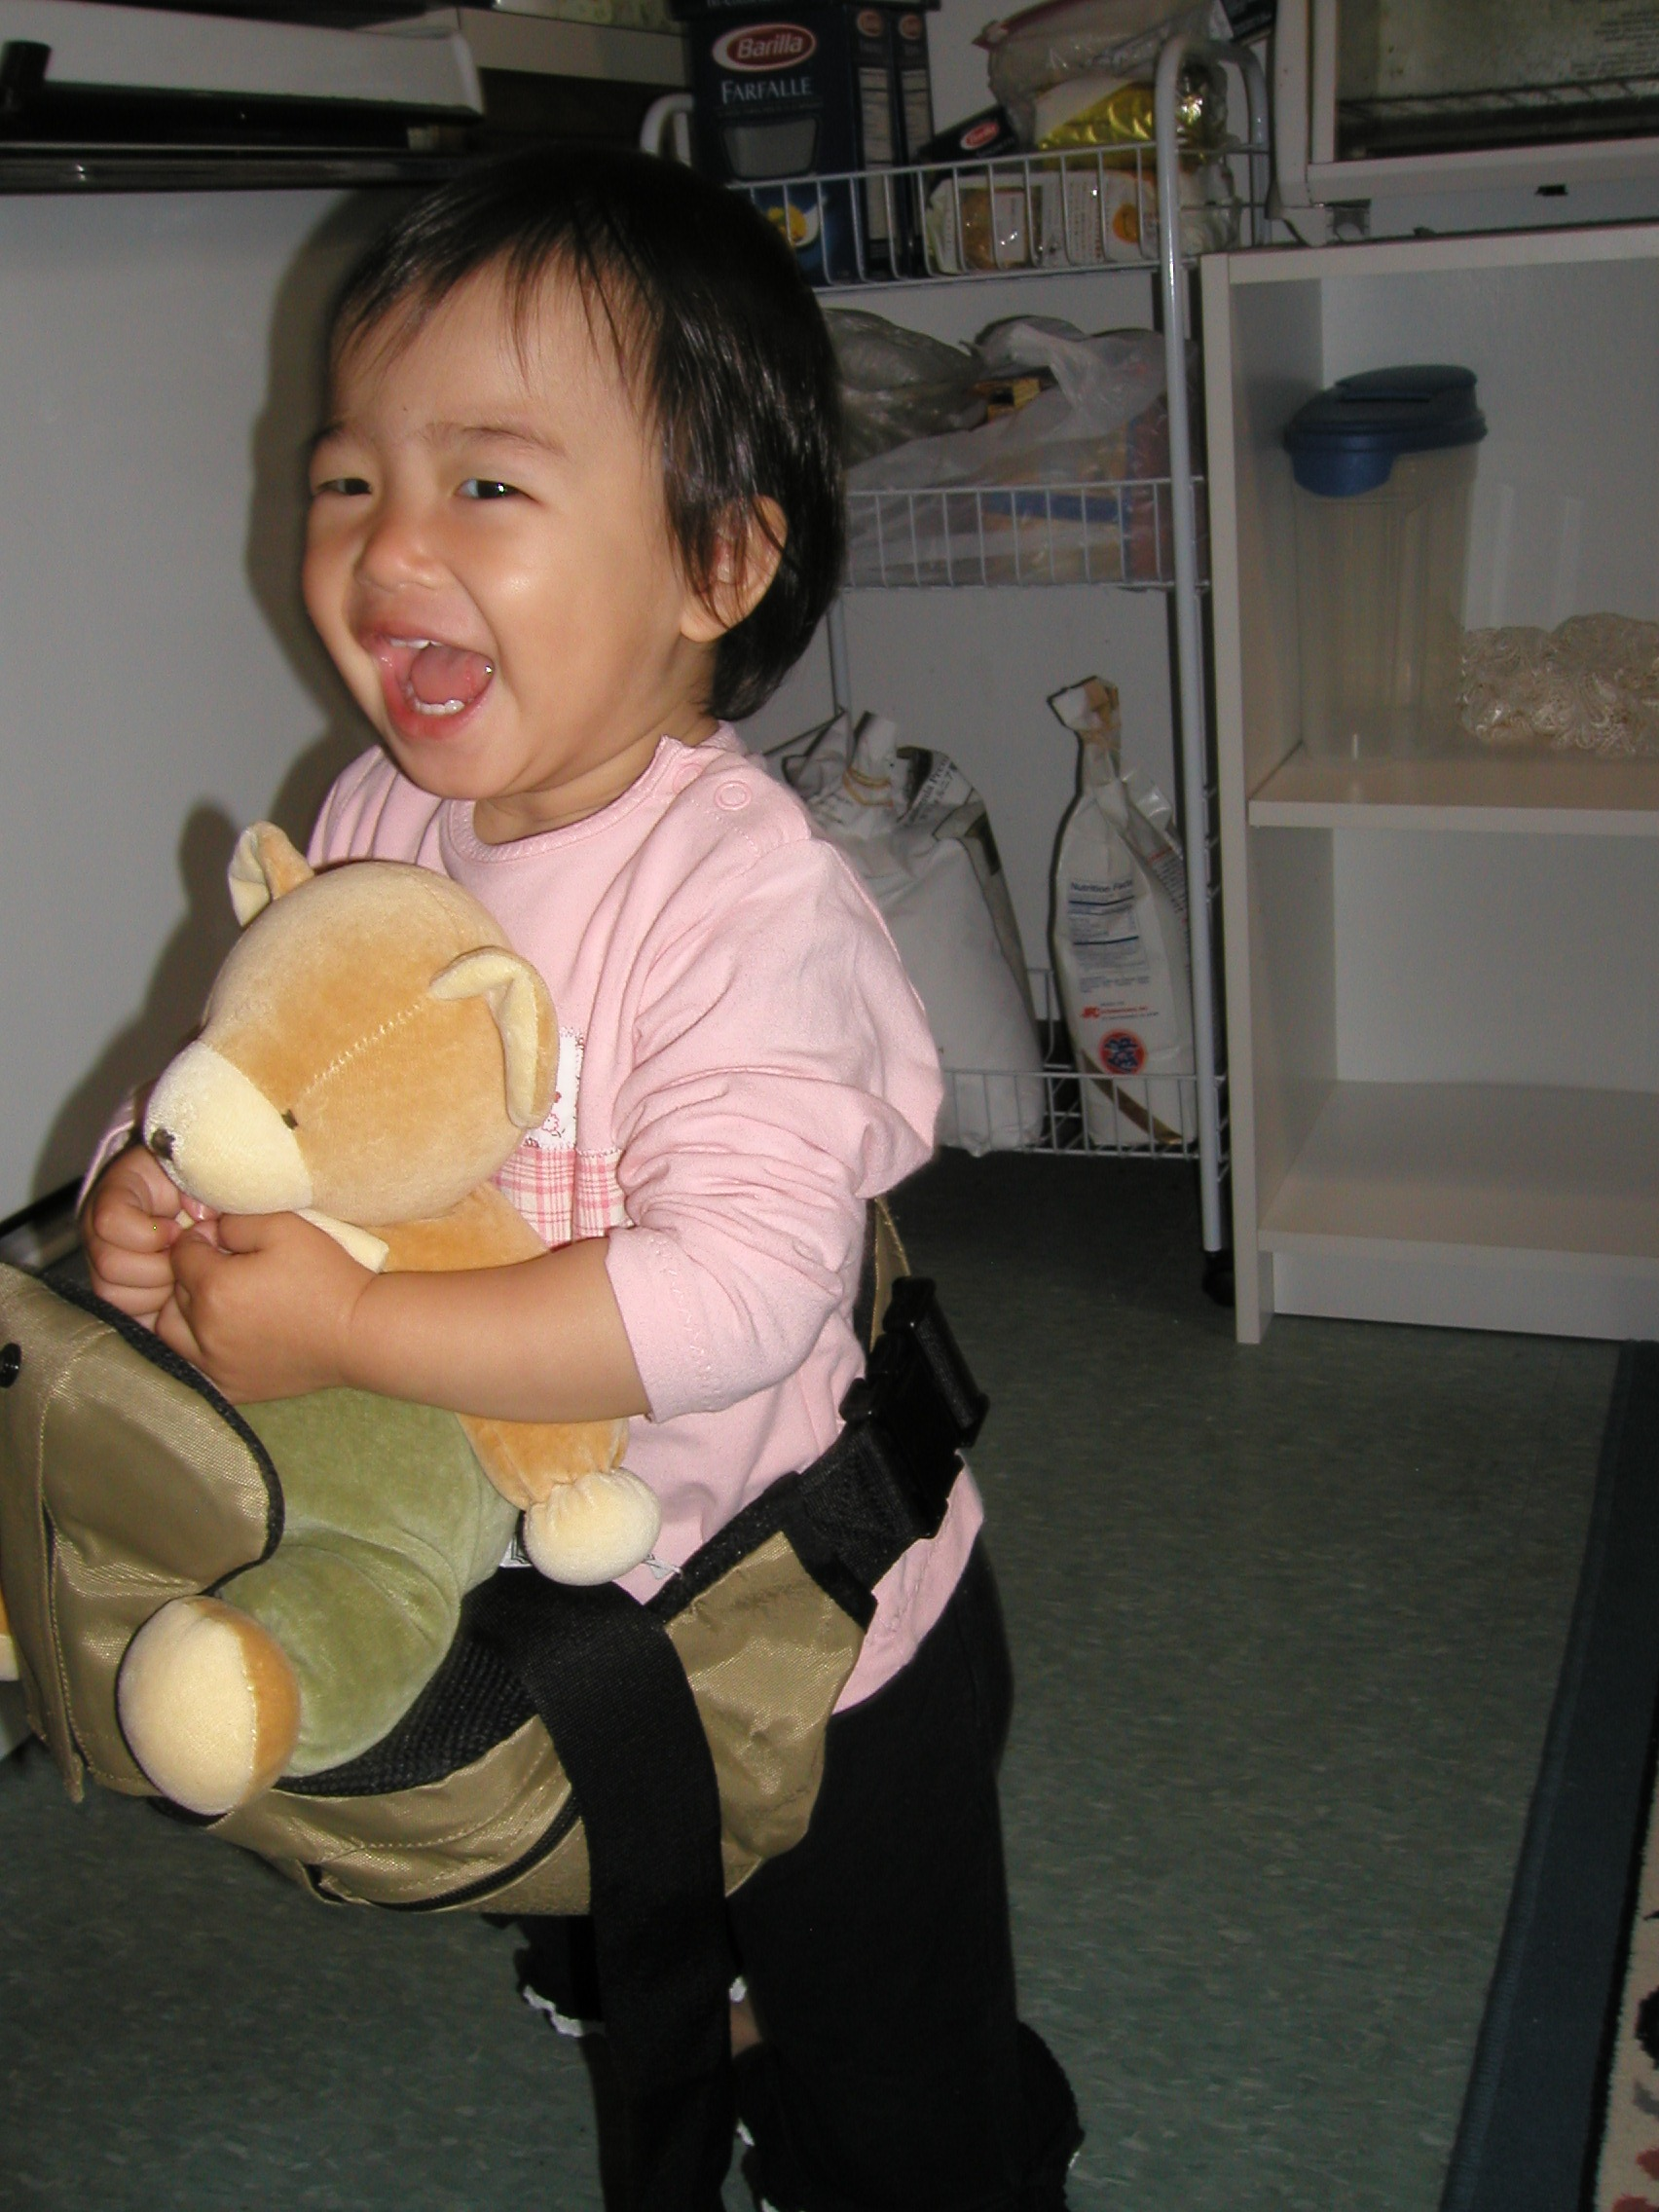

'/content/drive/Shared drives/INST341/images/867708.jpg'

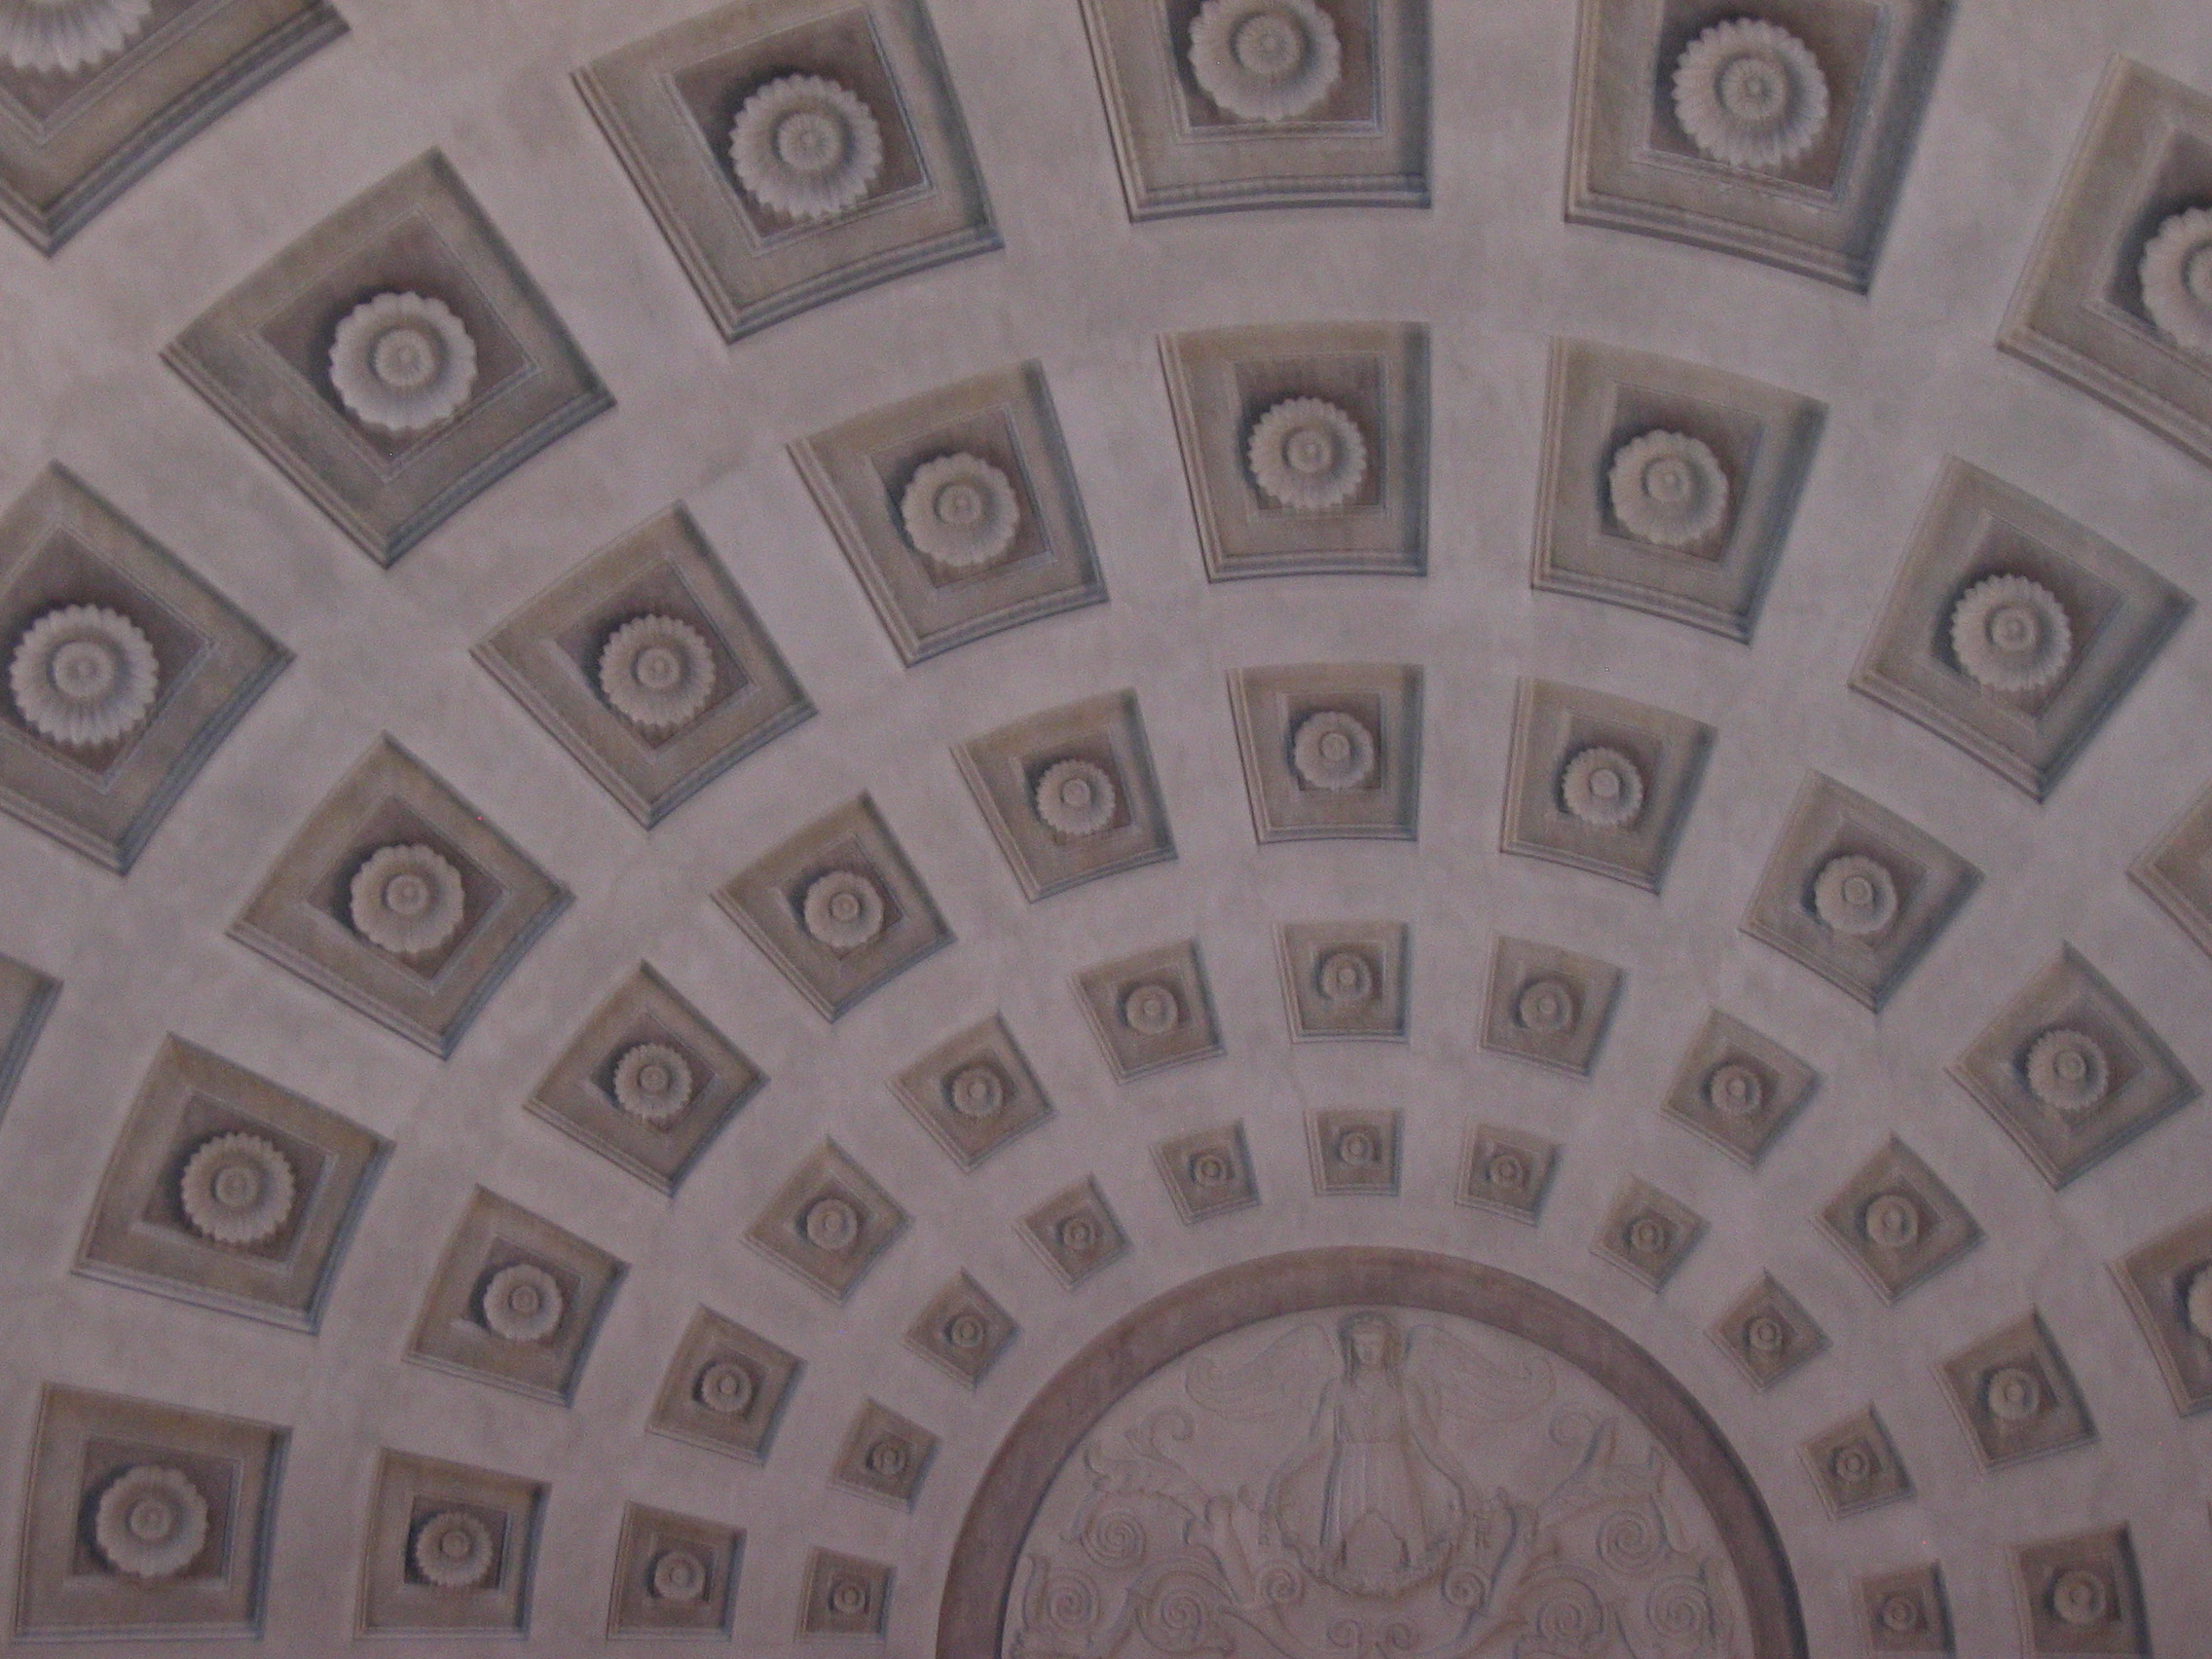

'/content/drive/Shared drives/INST341/images/932631.jpg'

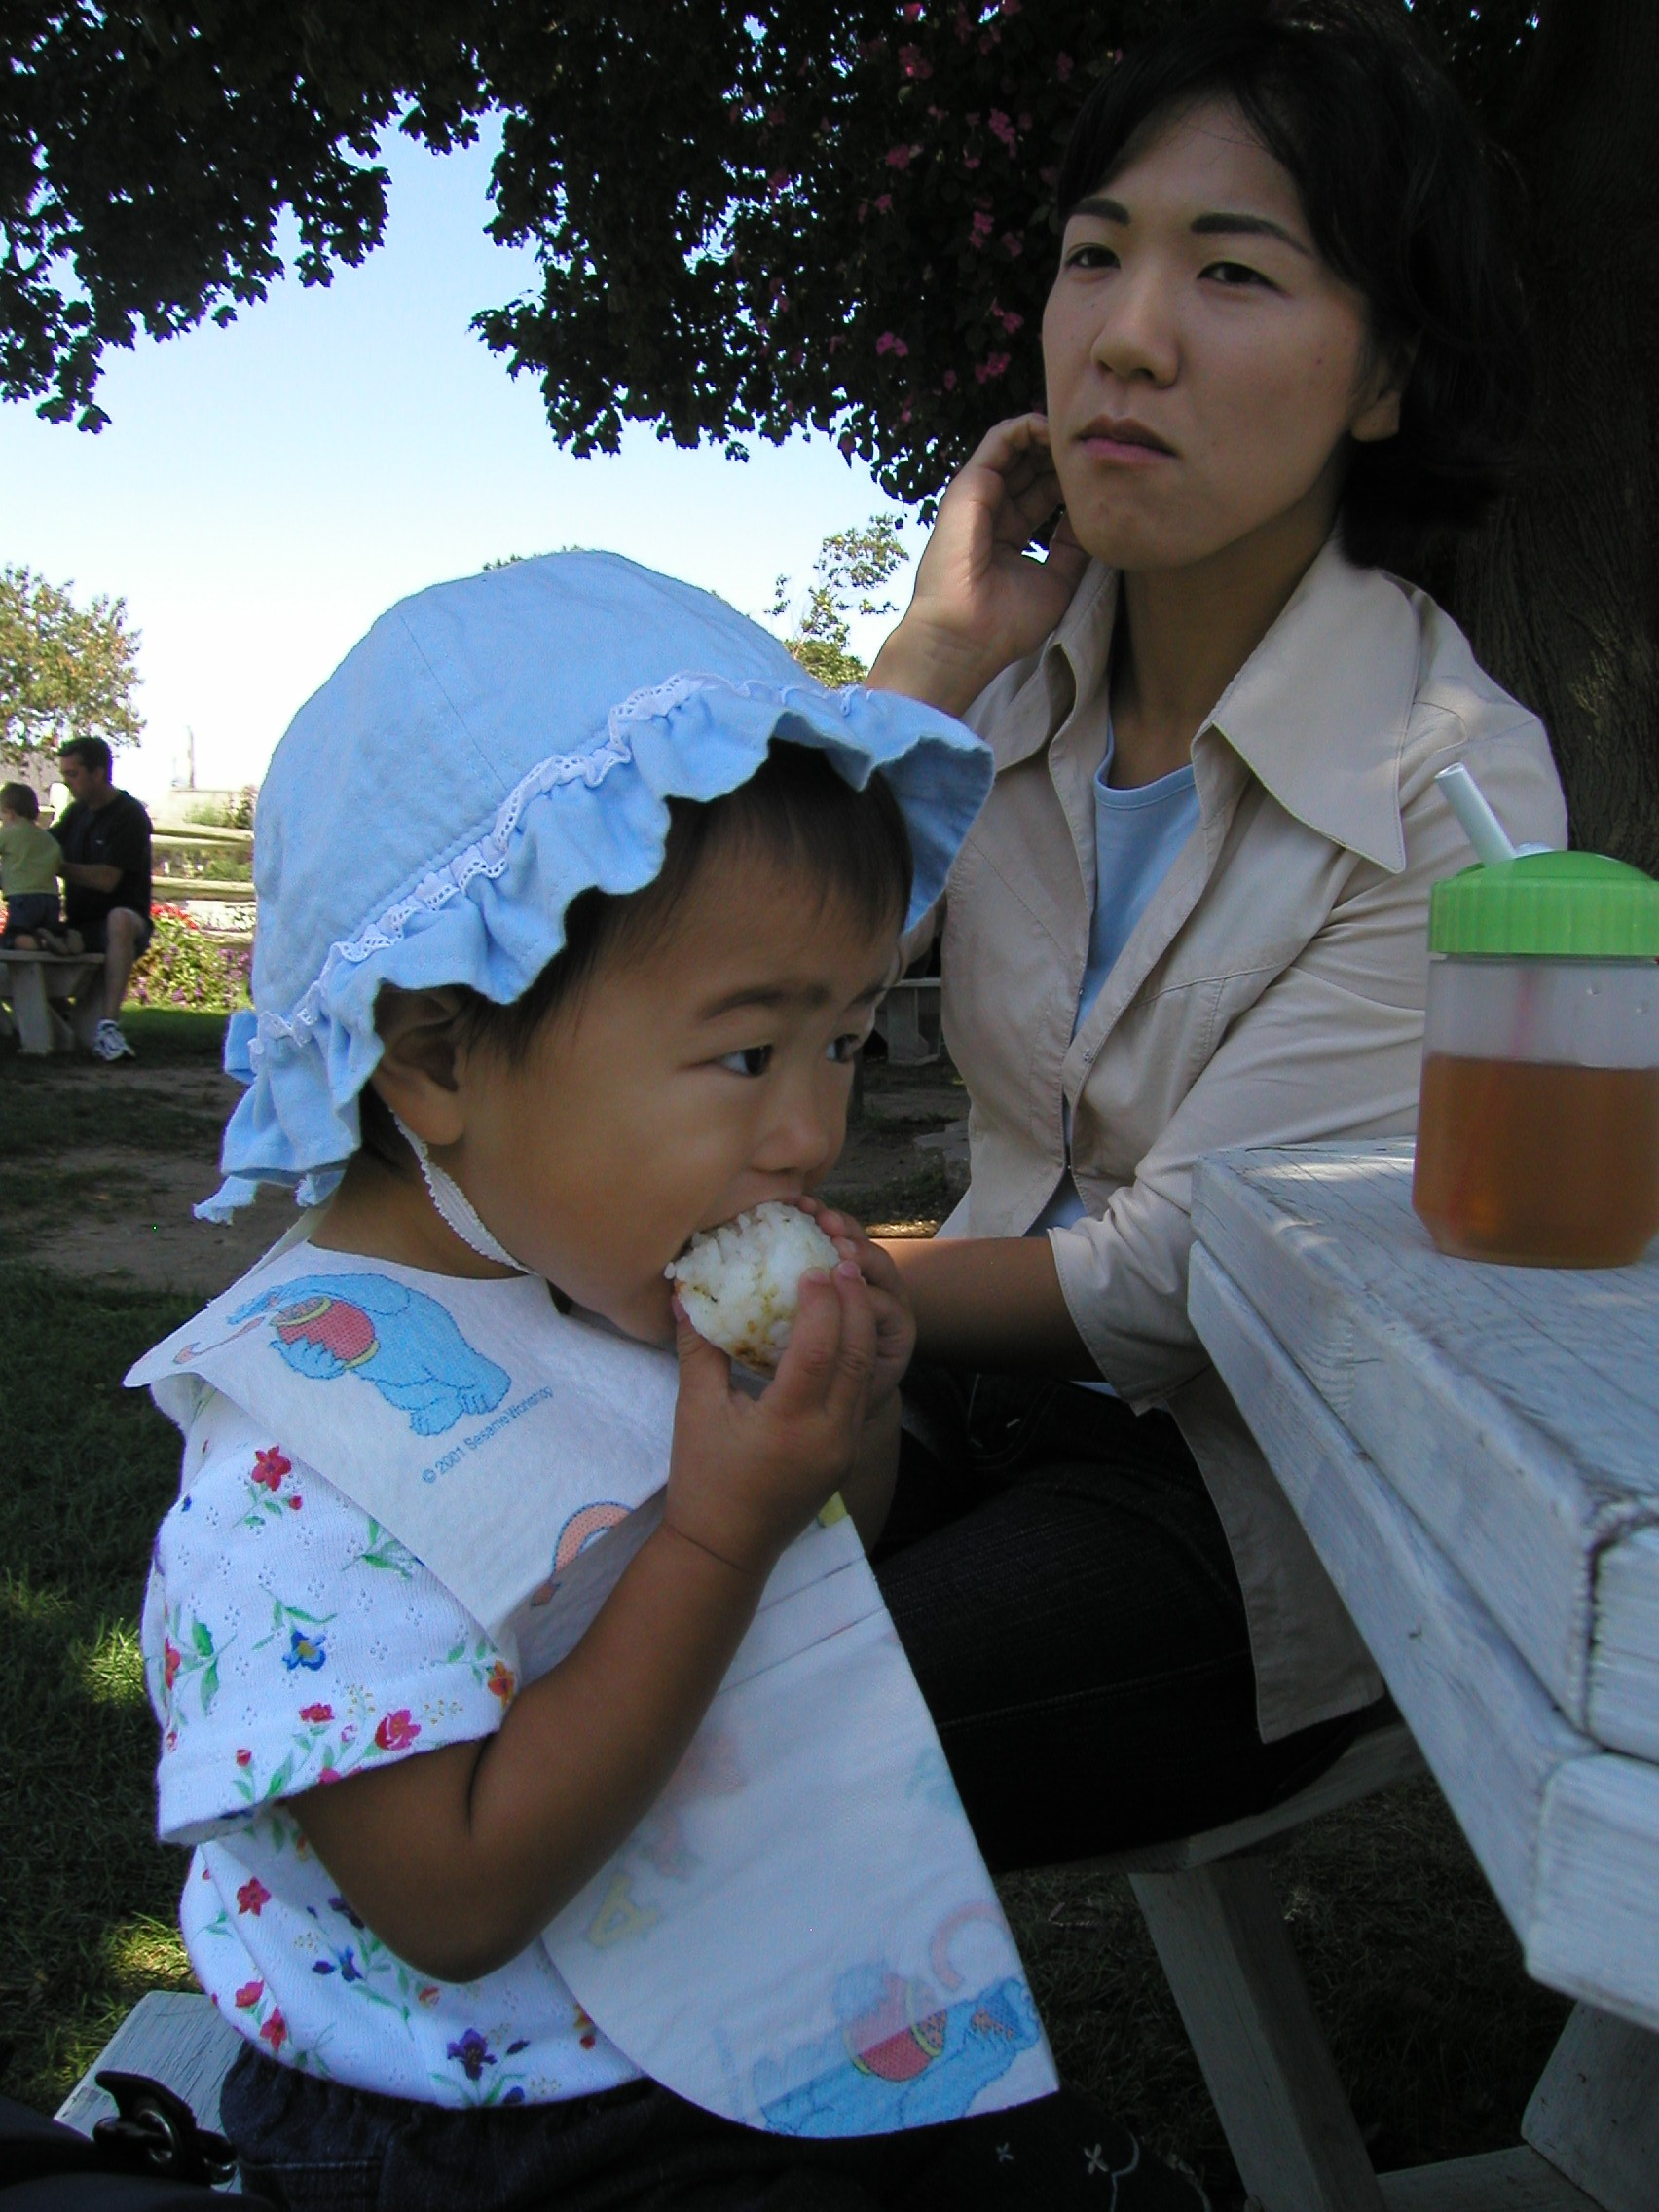

'/content/drive/Shared drives/INST341/images/673423.jpg'

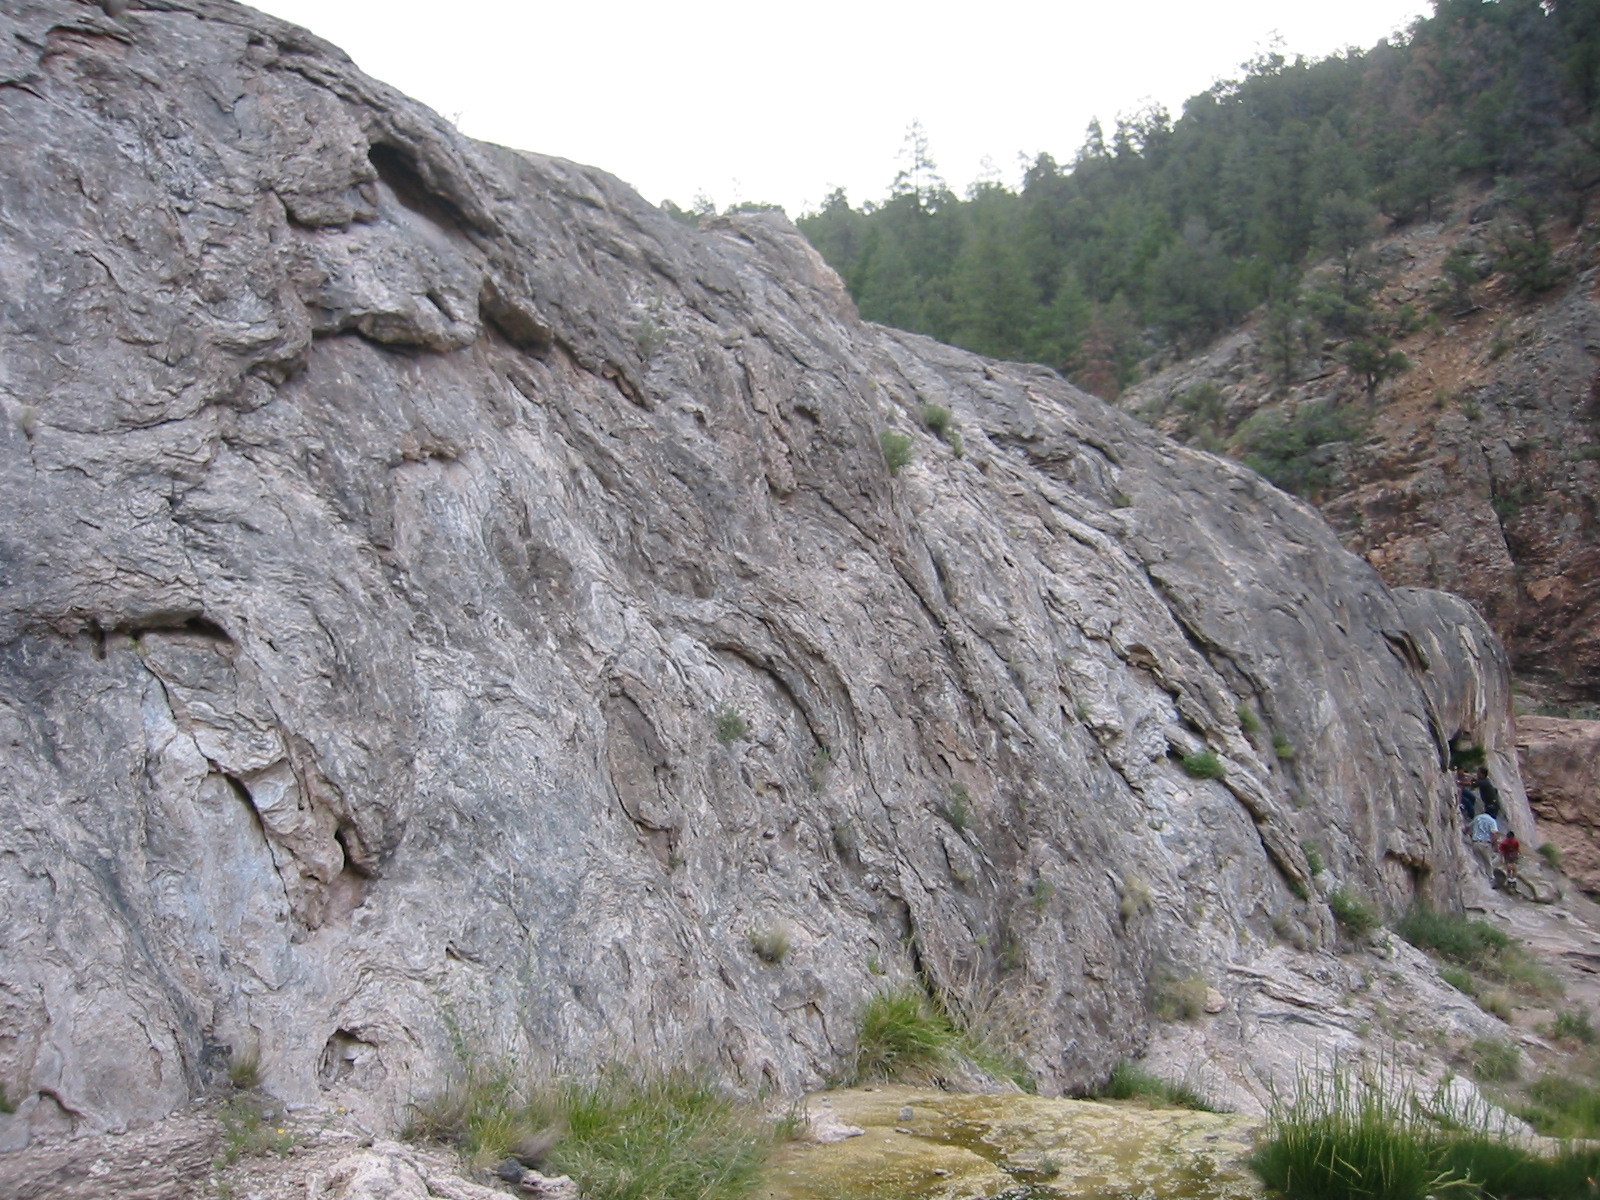

In [8]:
from random import sample

for i in sample(image_paths, 5):
  
  # display the image path
  display(i.as_posix())

  # display the image
  # note: the Image class wants the filename to be a string so as_posix() is used.
  display(Image(filename=i.as_posix(), width=450, embed=True))


Each time you run the cell above you should see a different set of 5 images.

## Exif

[Extensible Image File Format](https://en.wikipedia.org/wiki/Exif) or Exif is a standard for embedding metadata in image files. It is used by digital cameras to record things like when an image was created, what type of camera created it, the resolution and image size, and sometimes even *where* the image was taken.

Since Exif, JPEG, PNG and GIF are open standards there is good support for them in programming languages like Python. We can install the [exif](https://exif.readthedocs.io/en/latest/) module that makes it pretty easy.

In [9]:
!pip --quiet install exif

     |████████████████████████████████| 18.7MB 1.3MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 


Exif is a pretty flexible standard in that it doesn't require cameras record particular information, it just specifies how the key/value metadata is stored in the image file. Lets take a look at a specific image using its full path and print out the time it was created and the make and model of the camera that created the image.

The first step is to import `exif` and create an `exif.Image` object using the path.

In [10]:
import exif

image_path = '/content/drive/Shared drives/INFO202/images/674289.jpg'
image  = exif.Image(image_path)

Now we can print out some of the Exif metadata and display the image itself:

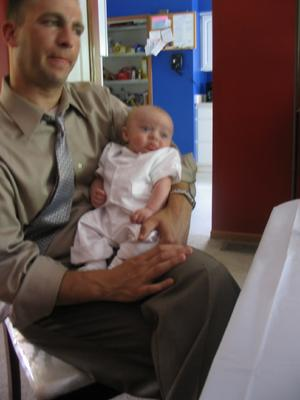

datetime: 2007:11:28 13:19:33
make: OLYMPUS CORPORATION    
model: u30D,S410D,u410D


In [52]:
display(Image(image_path, embed=True))
print('datetime:', image.get('datetime'))
print('make:', image.get('make'))
print('model:', image.get('model'))

## Datetimes

Imagine that you have been tasked with curating a set of digital photos that have been donated as part of a collection. In your description of the data you want to be able to say what years these photos are taken.

We can use a loop to extract the `datetime` Exif metadata, parse it using the [datetime.strptime](https://docs.python.org/3/library/datetime.html?highlight=strptime#datetime.datetime.strptime) function, and count the years with a [Counter](https://docs.python.org/3/library/collections.html).

In [15]:
from datetime import datetime
from collections import Counter

years = []

for p in images_dir.iterdir():
  image = exif.Image(p)
  dt = image.get('datetime')

  # parse the date
  t = datetime.strptime(dt, '%Y:%m:%d %H:%M:%S')
  years.append(t.year)

year_counts = Counter(years)
print(year_counts)

Counter({2004: 28, 2005: 26, 2006: 20, 2007: 19, 2003: 17, 2002: 13, 2000: 2, 2008: 2, 2001: 2, 2009: 1})


If we want to get fancy we can use the [matplotlib](https://matplotlib.org/) to display a little bar chart for the year counts:

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

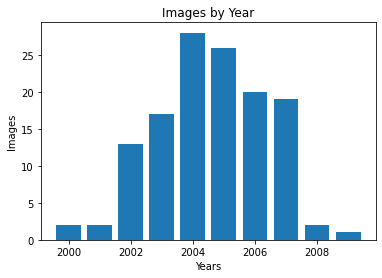

In [48]:
! pip install --quiet matplotlib

import matplotlib.pyplot as plt

plt.bar(year_counts.keys(), year_counts.values())
plt.title('Images by Year')
plt.ylabel('Images')
plt.xlabel('Years')
plt

## Exercise

You are a data scientist working at a large newspaper. You have been given the job of helping the newspaper decide what camera equipment to purchase for its photo journalism department. The newspaper has all their images stored in the `images_dir` you have been working with above.

1. Print out the `make` Exif metadata for all the images in the `images_dir` directory.

2. How many images are there for each manufacturer? Hint: remember one way to do this is to loop through the files, and add all the make values in a list, and then use a Counter once you are done to count them up.

3. What challenge do you see that there is in counting the manufacturers? Describe how you might go about fixing it?

4. Optional: can you figure out how to make a bar chart of the manufacturer data?